<a href="https://colab.research.google.com/github/Dmtrvna/MML/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

## Подготовка данных

In [30]:
!pip install pandas seaborn scikit-learn

In [167]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [122]:
df = pd.read_csv("/content/student_depression_dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [123]:
# Удаление лишних столбцов
df = df.drop(columns=['id'])

In [125]:
# Преобразование категориальных признаков в category
categorical = ["Gender", "City", "Profession", "Sleep Duration", "Dietary Habits",
               "Degree", "Have you ever had suicidal thoughts ?", "Financial Stress", "Family History of Mental Illness"]

for col in categorical:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

In [143]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

# y - целевая переменная, X - зависимые переменные
y = df.Depression
X = df.drop('Depression', axis=1)

# Проверяем, что Depression не существует
X.head(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No


In [144]:
y.head(5)

,Depression
0,1
1,0
2,0
3,1
4,0


In [145]:
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (27901, 16)
Размерность y: (27901,)


## EDA (разведочный анализ относительно целевой переменной)



В этом же блоке побороться с пропусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

### Анализ категориальных признаков

/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


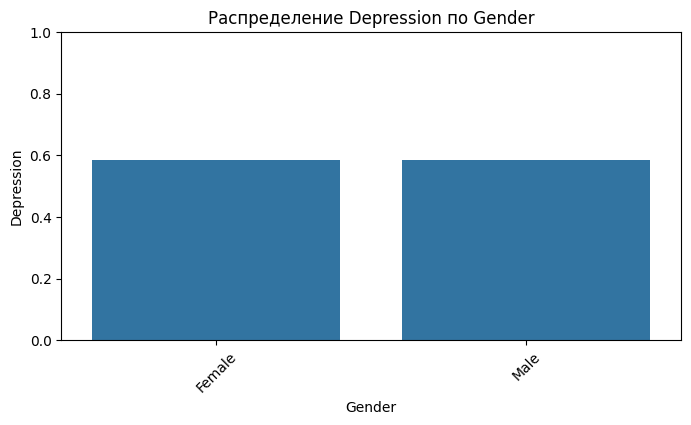

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())
/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


          count      mean       std  min  25%  50%  75%  max
Gender                                                      
Female  12354.0  0.584507  0.492827  0.0  0.0  1.0  1.0  1.0
Male    15547.0  0.586287  0.492514  0.0  0.0  1.0  1.0  1.0


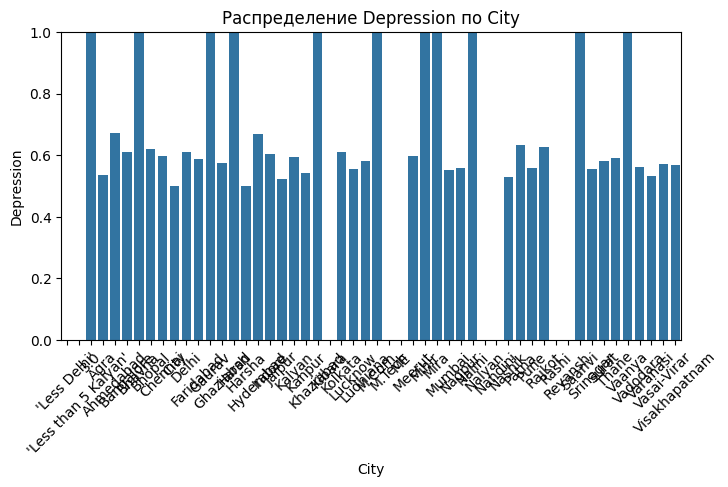

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())
/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


                       count      mean       std  min   25%  50%   75%  max
City                                                                       
'Less Delhi'             1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
'Less than 5 Kalyan'     1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
3.0                      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Agra                  1094.0  0.534735  0.499020  0.0  0.00  1.0  1.00  1.0
Ahmedabad              951.0  0.672976  0.469373  0.0  0.00  1.0  1.00  1.0
Bangalore              767.0  0.608866  0.488323  0.0  0.00  1.0  1.00  1.0
Bhavna                   2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
Bhopal                 934.0  0.619914  0.485668  0.0  0.00  1.0  1.00  1.0
Chennai                885.0  0.596610  0.490855  0.0  0.00  1.0  1.00  1.0
City                     2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Delhi                  768.0  0.609375  0.488208  0.0  0.00  1.0  1.00  1.0
Faridabad   

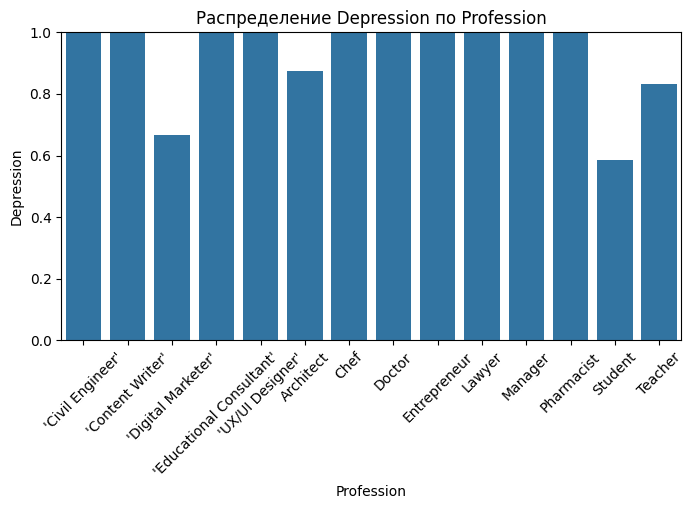

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())
/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


                            count      mean       std  min  25%  50%  75%  max
Profession                                                                    
'Civil Engineer'              1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
'Content Writer'              2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
'Digital Marketer'            3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0
'Educational Consultant'      1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
'UX/UI Designer'              1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Architect                     8.0  0.875000  0.353553  0.0  1.0  1.0  1.0  1.0
Chef                          2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Doctor                        2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Entrepreneur                  1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Lawyer                        1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Manager                       1.0  1.000000       Na

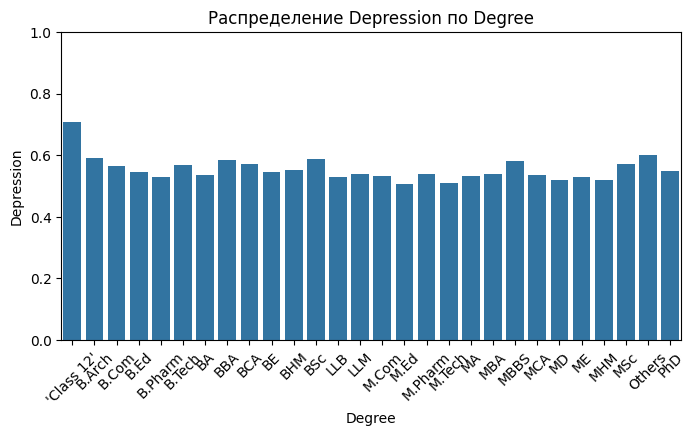

             count      mean       std  min  25%  50%  75%  max
Degree                                                         
'Class 12'  6080.0  0.707730  0.454843  0.0  0.0  1.0  1.0  1.0
B.Arch      1478.0  0.589310  0.492126  0.0  0.0  1.0  1.0  1.0
B.Com       1506.0  0.566401  0.495736  0.0  0.0  1.0  1.0  1.0
B.Ed        1867.0  0.546867  0.497932  0.0  0.0  1.0  1.0  1.0
B.Pharm      810.0  0.528395  0.499501  0.0  0.0  1.0  1.0  1.0
B.Tech      1152.0  0.568576  0.495490  0.0  0.0  1.0  1.0  1.0
BA           600.0  0.535000  0.499190  0.0  0.0  1.0  1.0  1.0
BBA          696.0  0.584770  0.493116  0.0  0.0  1.0  1.0  1.0
BCA         1433.0  0.571528  0.495030  0.0  0.0  1.0  1.0  1.0
BE           613.0  0.544861  0.498390  0.0  0.0  1.0  1.0  1.0
BHM          925.0  0.550270  0.497736  0.0  0.0  1.0  1.0  1.0
BSc          888.0  0.588964  0.492299  0.0  0.0  1.0  1.0  1.0
LLB          671.0  0.530551  0.499438  0.0  0.0  1.0  1.0  1.0
LLM          482.0  0.537344  0.499121  

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())
/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


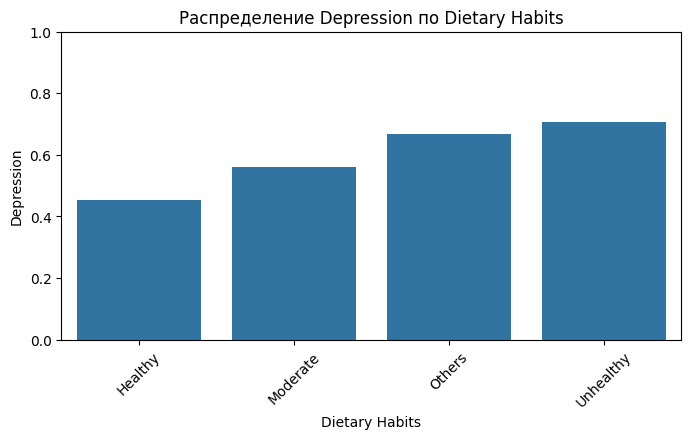

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())


                  count      mean       std  min  25%  50%  75%  max
Dietary Habits                                                      
Healthy          7651.0  0.453928  0.497905  0.0  0.0  0.0  1.0  1.0
Moderate         9921.0  0.560226  0.496385  0.0  0.0  1.0  1.0  1.0
Others             12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0
Unhealthy       10317.0  0.707279  0.455033  0.0  0.0  1.0  1.0  1.0


/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


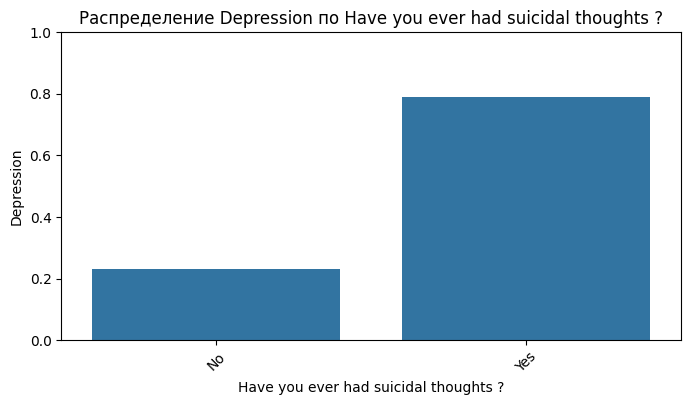

/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())
/tmp/ipython-input-3597023884.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Depression', data=df, ci=None)


                                         count      mean       std  min  25%  \
Have you ever had suicidal thoughts ?                                          
No                                     10245.0  0.232211  0.422263  0.0  0.0   
Yes                                    17656.0  0.790496  0.406966  0.0  1.0   

                                       50%  75%  max  
Have you ever had suicidal thoughts ?                 
No                                     0.0  0.0  1.0  
Yes                                    1.0  1.0  1.0  


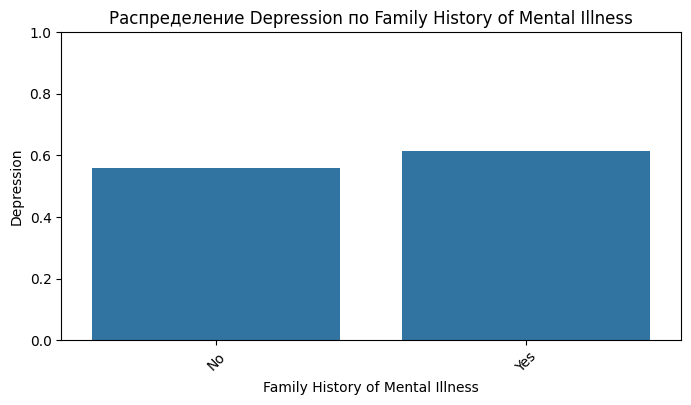

                                    count      mean       std  min  25%  50%  \
Family History of Mental Illness                                               
No                                14398.0  0.560008  0.496403  0.0  0.0  1.0   
Yes                               13503.0  0.612679  0.487156  0.0  0.0  1.0   

                                  75%  max  
Family History of Mental Illness            
No                                1.0  1.0  
Yes                               1.0  1.0  


/tmp/ipython-input-3597023884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['Depression'].describe())


In [146]:
# boxplot распределения целевой переменной по категориальным признакам
categorical_cols = ['Gender', 'City', 'Profession', 'Degree', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='Depression', data=df, ci=None)
    plt.title(f'Распределение Depression по {col}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

    print(df.groupby(col)['Depression'].describe())

Анализ категориальных признаков относительно целевой переменной Depression показал:

*   По Gender средний уровень депрессии практически одинаков у мужчин и женщин, что говорит о слабой или отсутствии значимой связи.
*   В признаке City наблюдается сильное различие доли депрессии по городам, в некоторых городах уровень депрессии существенно выше, что важно учесть.
*   В Profession значительная часть студентов, при этом отдельные профессии демонстрируют высокий уровень депрессии, что может быть признаком влияния профессии.
*   Dietary Habits показывают тенденцию: с ухудшением пищевых привычек средний уровень депрессии растёт.
*   Наличие суицидальных мыслей значительно коррелирует с депрессией — у тех, кто имел мысли, вероятность депрессии гораздо выше.
*  Семейная история психических заболеваний также связана с более высоким уровнем депрессии.
*   Degree имеет некоторое распределение, где категории с низшими уровнями образования демонстрируют более высокий уровень депрессии.

### Анализ числовых признаков

In [147]:
num_col = ["Age", "CGPA", "Work/Study Hours"]
X_num = X[num_col]

# Объединяем y и числовые признаки в один датафрейм для подсчёта корреляций
df_corr = pd.concat([y, X_num], axis=1)

# Вычисляем корреляционную матрицу Пирсона
corr_matrix = df_corr.corr()

# Отобразим корреляции именно между y и числовыми признаками
corr_with_y = corr_matrix['Depression'].drop('Depression')

corr_with_y


,Depression
Age,-0.226422
CGPA,0.022210
Work/Study Hours,0.208563


Из представленных значений коэффициентов корреляции Пирсона между целевой переменной Depression и числовыми признаками:

*   Age: корреляция -0.226, что свидетельствует о средней отрицательной связи. Это значит, что с увеличением возраста вероятность депрессии может снижаться.
*   CGPA: корреляция очень близка к нулю (0.022), практически нет линейной связи с депрессией.
*   Work/Study Hours: корреляция 0.209, то есть с увеличением количества часов работы/учёбы вероятность депрессии возрастает.

### Отбор признаков

In [148]:
# Отобранные категориальные фичи
categorial_features = ['City', 'Profession', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                 'Family History of Mental Illness']

# Отобранные числовые непрерывные фичи
numeric_features = ["Age", "Work/Study Hours"]

best_features = categorial_features + numeric_features

### Проверка пропусков

In [149]:
# Проверка пропусков в целевой переменной
y.isnull().sum()

np.int64(0)

In [150]:
# Проверка пропусков во всех признаках
X.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


В результате видим, что в нашем датасете нет пропусков.

## Моделирование

### Описание



**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные колонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

### Предобработка

In [151]:
# Категориальные признаки
cat_cols = ["City", "Profession", "Dietary Habits", "Academic Pressure", "Work Pressure",
           "Study Satisfaction", "Job Satisfaction", "Sleep Duration", "Degree", "Financial Stress"]
bin_cols = ['Gender', "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

# LabelEncoder для бинарных признаков
for col in bin_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# OneHotEncoder для меток
for col in cat_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    encoded = pd.DataFrame(ohe.fit_transform(X[[col]]), columns=ohe.get_feature_names_out([col]), index=X.index)
    X = X.drop(col, axis=1)
    X = pd.concat([X, encoded], axis=1)

In [152]:
# Числовые признаки

num_cols = ['Age', 'CGPA', 'Work/Study Hours']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [153]:
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (27901, 125)
Размерность y: (27901,)


OneHotEncoder переводит каждую категориальную переменную в набор бинарных признаков по количеству уникальных категорий.В результате общее число столбцов значительно увеличивается, что влияет на размер итоговой матрицы признаков.

### Моделирование

#### Метрики

In [158]:
def metrics(y, y_pred):
    MAE = mean_absolute_error(y, y_pred)
    MAPE = mean_absolute_percentage_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    MSE = mean_squared_error(y, y_pred)
    RMSE = root_mean_squared_error(y, y_pred)

    print(f'MAE: {MAE:.3f}')
    print(f'MAPE: {MAPE:.3f}')
    print(f'R²: {R2:.3f}')
    print(f'MSE: {MSE:.3f}')
    print(f'RMSE: {RMSE:.3f}')

#### Модель 1

In [162]:
from sklearn.linear_model import LinearRegression

# Обучаем модель
model1 = LinearRegression()
model1.fit(X, y)

# Предсказания
y_pred1 = model1.predict(X)

# Метрики качества
metrics(y, y_pred1)

# Коэффициенты модели
coeffs = pd.Series(model1.coef_, index=X.columns)
print('\nКоэффициенты признаков (важность):')
display(coeffs)

MAE: 0.265
MAPE: 581273147759129.000
R²: 0.522
MSE: 0.116
RMSE: 0.340

Коэффициенты признаков (важность):


,0
Gender,0.000362
Age,-0.071601
CGPA,0.009939
Have you ever had suicidal thoughts ?,0.377129
Work/Study Hours,0.052359
...,...
Financial Stress_2.0,0.059488
Financial Stress_3.0,0.147196
Financial Stress_4.0,0.206790
Financial Stress_5.0,0.273075


Интерпретация результатов Модели 1:

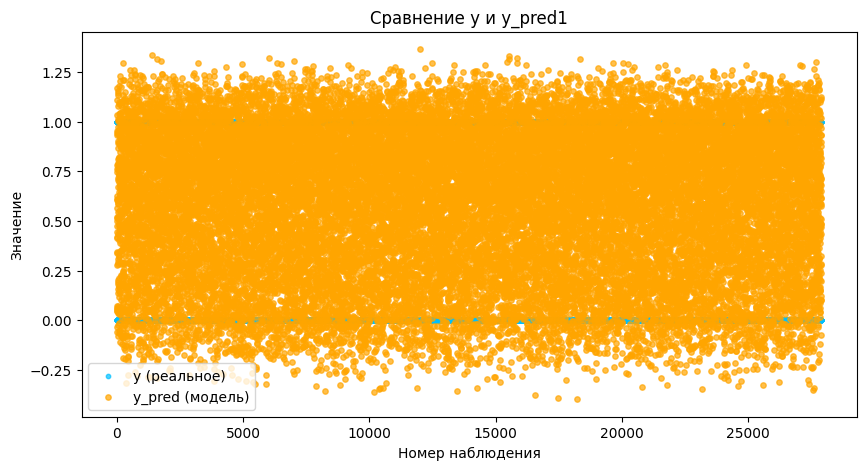

In [165]:

plt.figure(figsize=(10,5))
plt.scatter(range(len(y)), y, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y)), y_pred1, s=15, color='orange', label='y_pred (модель)', alpha=0.7)
plt.title('Сравнение y и y_pred1')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()

Видим, что у нас явно что-то пошло не так, наверное.

#### Модель 2

In [179]:
# Разделяем данные: 80% — обучение, 20% — тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на training
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Метрики для обучающей выборки
print("Train metrics:")
metrics(y_train, y_train_pred)

# Метрики для тестовой выборки
print("\nTest metrics:")
metrics(y_test, y_test_pred)

Train metrics:
MAE: 0.263
MAPE: 575454965845917.875
R²: 0.528
MSE: 0.115
RMSE: 0.338

Test metrics:
MAE: 0.272
MAPE: 602626546876654.750
R²: 0.498
MSE: 0.122
RMSE: 0.350


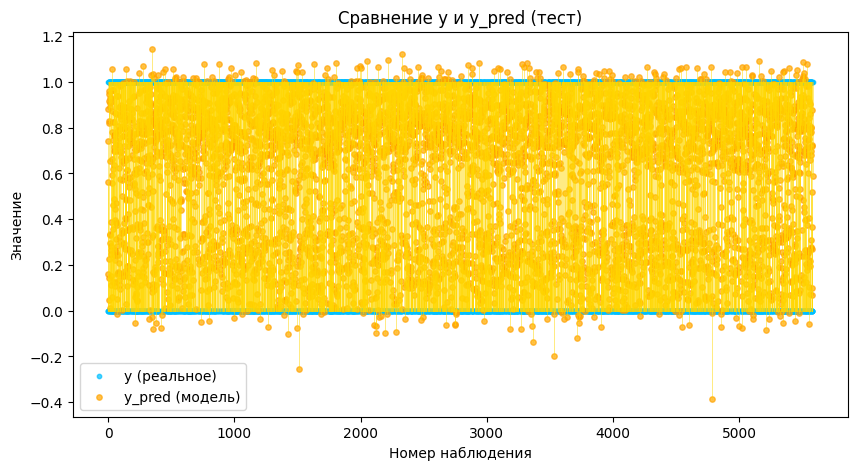

In [188]:
# Визуализация: сравнение реальных и прогнозных для тестовой выборки + линии
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y_test)), y_test_pred, s=15, color='orange', label='y_pred (модель)', alpha=0.7)

for i in range(len(y_test)):
    plt.plot([i, i], [y_test.iloc[i], y_test_pred[i]], color='gold', alpha=0.5, linewidth=0.7)

plt.title('Сравнение y и y_pred (тест)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()


Видим, что стало ещё хуже

#### Модель 3

In [182]:
categorial_features = ['City', 'Profession', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                 'Family History of Mental Illness']
numeric_features = ["Age", "Work/Study Hours"]

best_features = categorial_features + numeric_features

# Выделяем данные по признакам
X_cat = df[categorial_features].astype('category')
X_num = df[numeric_features]

# OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_cat)
cat_feature_names = encoder.get_feature_names_out(categorial_features)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Объединение обработанных признаков
X_scaled = pd.DataFrame(
    np.hstack([X_num_scaled, X_cat_encoded]),
    columns=list(numeric_features) + list(cat_feature_names),
    index=df.index
)

In [184]:
# Обучение модели
model3 = LinearRegression()
model3.fit(X_scaled, y)

# Предсказания
y_pred = model3.predict(X_scaled)

# Метрики качества
metrics(y, y_pred)

# Коэффициенты модели
coeffs = pd.Series(model3.coef_, index=X_scaled.columns)
print('\nКоэффициенты признаков (важность):')
display(coeffs)


MAE: 0.309
MAPE: 693815875128347.250
R²: 0.370
MSE: 0.153
RMSE: 0.391

Коэффициенты признаков (важность):


,0
Age,-0.077301
Work/Study Hours,0.067959
City_'Less than 5 Kalyan',0.123164
City_3.0,0.127174
City_Agra,0.054963
...,...
Dietary Habits_Moderate,0.071858
Dietary Habits_Others,0.129294
Dietary Habits_Unhealthy,0.168370
Have you ever had suicidal thoughts ?_Yes,0.505076


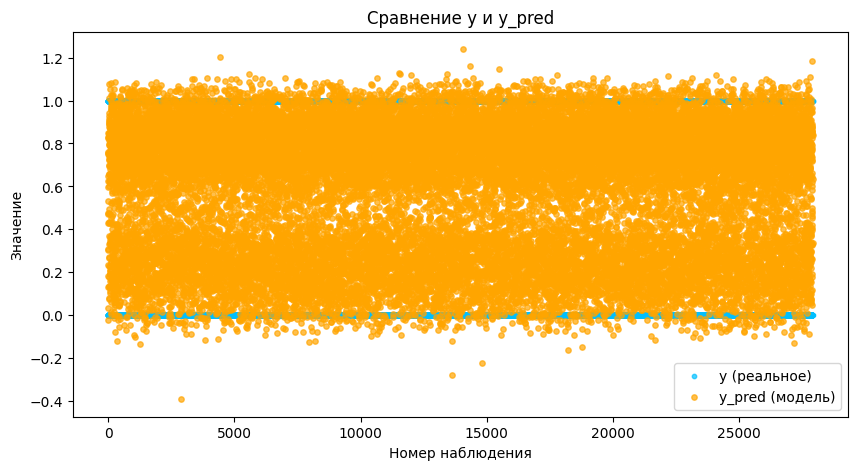

In [185]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y)), y, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y)), y_pred, s=15, color='orange', label='y_pred (модель)', alpha=0.7)
plt.title('Сравнение y и y_pred')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()

#### Модель 4

In [186]:
# Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучаем модель на обучающей выборке
model4 = LinearRegression()
model4.fit(X_train, y_train)

# Предсказания
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

# Метрики для обучающей выборки
print("Train metrics:")
metrics(y_train, y_train_pred)

# Метрики для тестовой выборки
print("\nTest metrics:")
metrics(y_test, y_test_pred)

# Коэффициенты модели
coeffs = pd.Series(model4.coef_, index=X_scaled.columns)
print('\nКоэффициенты признаков (важность):')
display(coeffs)

Train metrics:
MAE: 0.307
MAPE: 688337511536963.750
R²: 0.374
MSE: 0.152
RMSE: 0.390

Test metrics:
MAE: 0.314
MAPE: 710240817297239.000
R²: 0.351
MSE: 0.158
RMSE: 0.398

Коэффициенты признаков (важность):


,0
Age,-0.075285
Work/Study Hours,0.067321
City_'Less than 5 Kalyan',0.031467
City_3.0,0.037137
City_Agra,-0.036395
...,...
Dietary Habits_Moderate,0.072339
Dietary Habits_Others,0.140220
Dietary Habits_Unhealthy,0.166503
Have you ever had suicidal thoughts ?_Yes,0.510939


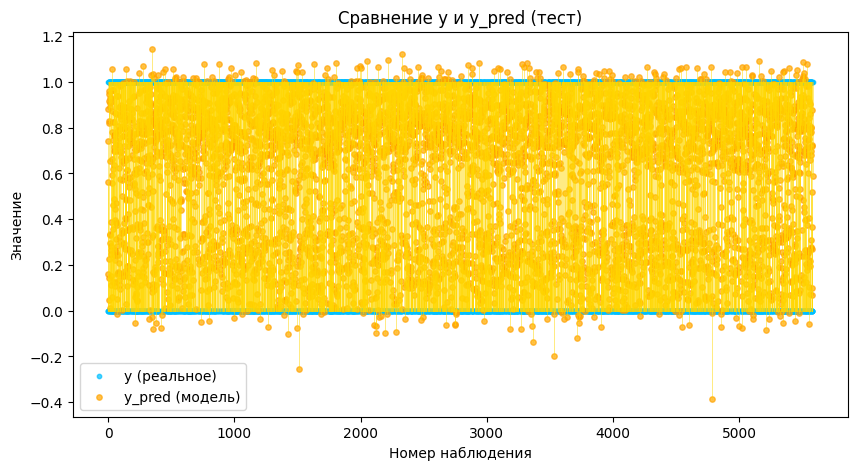

In [189]:
# Визуализация: сравнение реальных и прогнозных для тестовой выборки + линии
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y_test)), y_test_pred, s=15, color='orange', label='y_pred (модель)', alpha=0.7)

for i in range(len(y_test)):
    plt.plot([i, i], [y_test.iloc[i], y_test_pred[i]], color='gold', alpha=0.5, linewidth=0.7)

plt.title('Сравнение y и y_pred (тест)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()

## Подсказки

Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест